<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [29]:
import pandas as pd 
import numpy as np

In [30]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [31]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

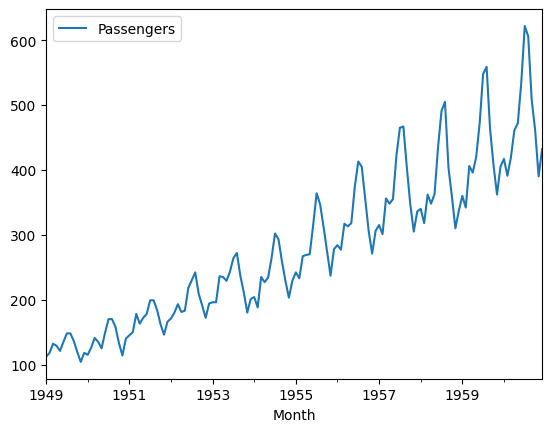

In [32]:
df.plot()

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
df.index.freq = 'MS'

In [35]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [36]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [57]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'add', seasonal = 'add', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues


In [60]:
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

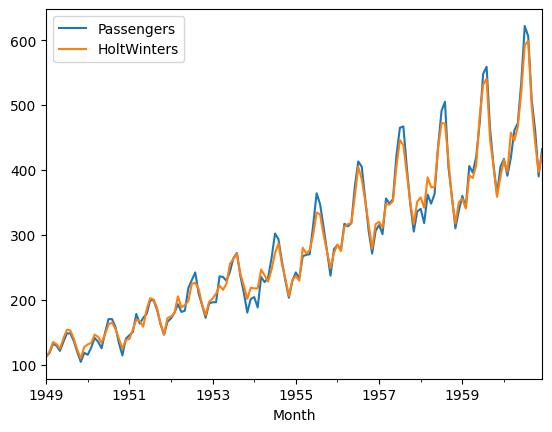

In [61]:
df[['Passengers','HoltWinters']].plot()

In [62]:
def rmse(y, t) : 
  return np.sqrt(np.mean((y-t)**2))

In [63]:
def mae(y, t): 
  return np.mean(np.abs(y-t))

In [72]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))


Train RMSE:  11.624714430673352
Test RMSE:  16.978029847029934


In [74]:
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train MAE:  9.006650631052384
Test MAE:  13.37759090303536


<Axes: xlabel='Month'>

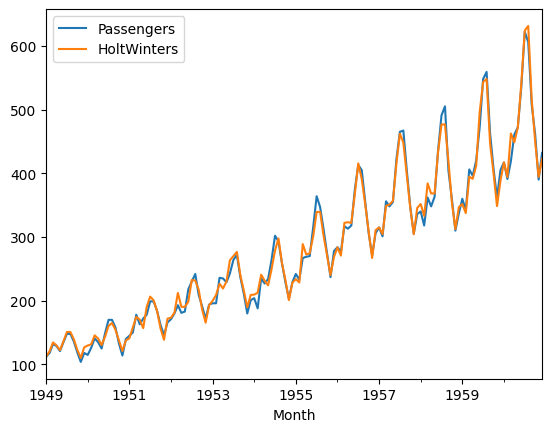

In [76]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'add', seasonal = 'mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot()

In [78]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))


Train RMSE:  9.767995205168011
Test RMSE:  15.810870232569963


In [80]:
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train MAE:  7.604272329965027
Test MAE:  10.30368288348438


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

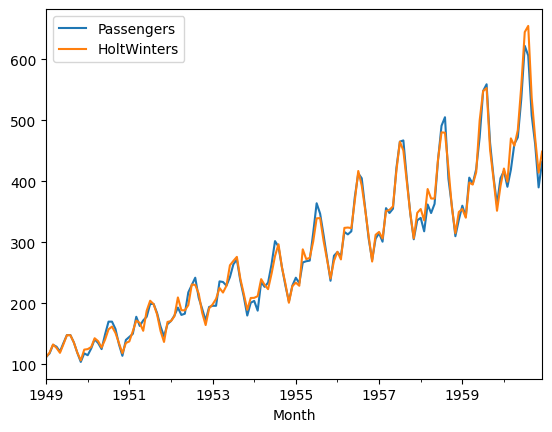

In [81]:
hw = ExponentialSmoothing(
    train['Passengers'], 
    initialization_method='legacy-heuristic', 
    trend = 'mul', seasonal = 'mul', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers','HoltWinters']].plot()

In [82]:
print("Train RMSE: ", rmse(train['Passengers'],res_hw.fittedvalues))
print("Test RMSE: ", rmse(test['Passengers'],res_hw.forecast(N_test)))

Train RMSE:  9.61792487803932
Test RMSE:  25.80687515735493


In [83]:
print("Train MAE: ", mae(train['Passengers'],res_hw.fittedvalues))
print("Test MAE: ", mae(test['Passengers'],res_hw.forecast(N_test)))


Train MAE:  7.112379992634933
Test MAE:  20.844988412204554
